In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_csv('laptop_project.csv' , index_col  = 0)

In [5]:
df.head()

,name,price
0,HP 14s Backlit Intel Core i3 11th Gen 1115G4 -...,"₹37,999"
1,Acer Aspire Intel Core i5 12th Gen 12450H - (1...,"₹44,500"
2,ASUS ASUS Vivobook S 15 Intel Core i5 13th Gen...,"₹69,900"
3,HP Chromebook MediaTek MT8183 - (4 GB/32 GB EM...,"₹9,990"
4,Primebook Wifi MediaTek MT8183 - (4 GB/64 GB E...,"₹10,990"


In [6]:
df.shape

(655, 2)

In [7]:
df.duplicated().sum()

88

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,name,price
0,HP 14s Backlit Intel Core i3 11th Gen 1115G4 -...,"₹37,999"
1,Acer Aspire Intel Core i5 12th Gen 12450H - (1...,"₹44,500"
2,ASUS ASUS Vivobook S 15 Intel Core i5 13th Gen...,"₹69,900"
3,HP Chromebook MediaTek MT8183 - (4 GB/32 GB EM...,"₹9,990"
4,Primebook Wifi MediaTek MT8183 - (4 GB/64 GB E...,"₹10,990"


In [11]:
df.tail()

,name,price
650,Infinix Zero Book Ultra AI PC Intel Core Ultra...,"₹64,990"
651,Lenovo IdeaPad Slim 5 2.5K IPS Intel Core i5 1...,"₹76,990"
652,DELL G15-5530 Intel Core i5 13th Gen 13450HX -...,"₹73,990"
653,DELL Inspiron Intel Core i5 13th Gen 13450HX -...,"₹74,890"
654,HP 15s Intel Core i3 11th Gen 1125G4 - (8 GB/5...,"₹44,890"


In [12]:
df['price'] = df['price'].str.replace('₹', '').str.replace(',', '').astype(int)

In [13]:
df.head()

,name,price
0,HP 14s Backlit Intel Core i3 11th Gen 1115G4 -...,37999
1,Acer Aspire Intel Core i5 12th Gen 12450H - (1...,44500
2,ASUS ASUS Vivobook S 15 Intel Core i5 13th Gen...,69900
3,HP Chromebook MediaTek MT8183 - (4 GB/32 GB EM...,9990
4,Primebook Wifi MediaTek MT8183 - (4 GB/64 GB E...,10990


In [14]:
df['name'][0]

'HP 14s Backlit Intel Core i3 11th Gen 1115G4 - (8 GB/512 GB SSD/Windows 11 Home) 14s-dq2649tu Thin and Light Laptop'

In [15]:
brands = [ 'HP', 'ASUS', 'Lenovo', 'DELL', 'MSI', 'Avita', 'Acer', 'Infinix', 'Apple', 'SAMSUNG', 'MICROSOFT', 'Ultimus', 'GIGABYTE', 
          'ZEBRONICS', 'Colorful', 'CHUWI', 'WINGS', 'realme', 'Thomson', 'ALIENWARE', 'WarnerCann', 'Vaio', 'Primebook',
          'AXL', 'walker', 'FUTOPIA']
# Create a regex pattern with all brand names 
brands_pattern = '|'.join(brands)

In [16]:
brands_pattern

'HP|ASUS|Lenovo|DELL|MSI|Avita|Acer|Infinix|Apple|SAMSUNG|MICROSOFT|Ultimus|GIGABYTE|ZEBRONICS|Colorful|CHUWI|WINGS|realme|Thomson|ALIENWARE|WarnerCann|Vaio|Primebook|AXL|walker|FUTOPIA'

In [17]:
df['Brand'] = df['name'].str.extract(f'({brands_pattern})', expand=False)

In [18]:
df.head()

,name,price,Brand
0,HP 14s Backlit Intel Core i3 11th Gen 1115G4 -...,37999,HP
1,Acer Aspire Intel Core i5 12th Gen 12450H - (1...,44500,Acer
2,ASUS ASUS Vivobook S 15 Intel Core i5 13th Gen...,69900,ASUS
3,HP Chromebook MediaTek MT8183 - (4 GB/32 GB EM...,9990,HP
4,Primebook Wifi MediaTek MT8183 - (4 GB/64 GB E...,10990,Primebook


In [19]:
df.Brand.isnull().sum()

0

In [20]:
processors = [ 'Intel Core i5', 'Intel Core i3', 'Intel Core i7', 'Intel Core i9','Intel Core Ultra' ,'Intel Core N N200' , 
              'Intel Celeron Quad Core' ,'Intel Core i5' , 'Intel Celeron Dual Core', 'Intel Core 5','Intel Core N N100' , 
              'Ryzen 5', 'Ryzen 7', 'M1', 'Ryzen 3' ,'Ryzen 9' , 'Ryzen 3'    , 'AMD Ryzen 7' , 'AMD Ryzen AI 9' , 
             'AMD Athlon' , 'MediaTek MT8183' , 'MediaTek Kompanio 1200' , 'AMD Dual Core A3020',
              'Qualcomm Snapdragon X Elite' , 'Intel Dual Core N4020' ,'Intel Pentium Gold 7505' ,
              'Qualcomm Snapdragon 7c Gen 2' , 'AMD Ryzen Z1' , 'Qualcomm']
processors_pattern = '|'.join(processors)

In [21]:
processors_pattern

'Intel Core i5|Intel Core i3|Intel Core i7|Intel Core i9|Intel Core Ultra|Intel Core N N200|Intel Celeron Quad Core|Intel Core i5|Intel Celeron Dual Core|Intel Core 5|Intel Core N N100|Ryzen 5|Ryzen 7|M1|Ryzen 3|Ryzen 9|Ryzen 3|AMD Ryzen 7|AMD Ryzen AI 9|AMD Athlon|MediaTek MT8183|MediaTek Kompanio 1200|AMD Dual Core A3020|Qualcomm Snapdragon X Elite|Intel Dual Core N4020|Intel Pentium Gold 7505|Qualcomm Snapdragon 7c Gen 2|AMD Ryzen Z1|Qualcomm'

In [22]:
df['Processor'] = df['name'].str.extract(f'({processors_pattern})', expand=False)

In [23]:
df['Processor'] = np.where(df['Brand'] == 'Apple', 'Apple Silicon', df['Processor'])

In [24]:
df['Processor'].isnull().sum()

0

In [25]:
df[df['price']==df['price'].max()]

,name,price,Brand,Processor
568,MSI Titan 18HX Intel Core i9 14th Gen 14900HX ...,418790,MSI,Intel Core i9


In [26]:
df['name'][186]

'Lenovo Legion Go AMD Ryzen Z1 Extreme - (16 GB/512 GB SSD/Windows 11 Home) 8APU1 Handheld Gaming PC'

In [27]:
df.Processor.value_counts()

Processor
Intel Core i5                   177
Intel Core i3                    96
Ryzen 5                          90
Intel Core i7                    59
AMD Ryzen 7                      33
Ryzen 3                          33
Intel Core Ultra                 19
Intel Celeron Dual Core          18
Intel Core i9                    11
Intel Core 5                      4
Ryzen 9                           3
Apple Silicon                     3
Intel Celeron Quad Core           3
AMD Athlon                        3
MediaTek MT8183                   3
Intel Core N N100                 2
AMD Dual Core A3020               1
Qualcomm                          1
AMD Ryzen AI 9                    1
Intel Pentium Gold 7505           1
AMD Ryzen Z1                      1
MediaTek Kompanio 1200            1
Qualcomm Snapdragon 7c Gen 2      1
Qualcomm Snapdragon X Elite       1
Intel Dual Core N4020             1
Intel Core N N200                 1
Name: count, dtype: int64

In [28]:
df['name'][3]

'HP Chromebook MediaTek MT8183 - (4 GB/32 GB EMMC Storage/Chrome OS) 11MK G9 EE Chromebook'

In [29]:
df['Processor'].isnull().sum()

0

In [30]:
df[df['Processor'].isnull()]

,name,price,Brand,Processor


In [31]:
df['name'][321]

'Acer AMD Dual Core A3020e - (4 GB/256 GB SSD/Windows 10 Home) EX215-22 Laptop'

In [32]:
generations = [ '10th Gen', '11th Gen', '12th Gen', '13th Gen', '14th Gen', '1st Gen', '2nd Gen', 
               '3rd Gen', '4th Gen', '5th Gen', '6th Gen', '7th Gen', '8th Gen', '9th Gen' ]
generations_pattern = '|'.join(generations)

In [33]:
df['Generation'] = df['name'].str.extract(f'({generations_pattern})', expand=False)

In [34]:
df.head()

,name,price,Brand,Processor,Generation
0,HP 14s Backlit Intel Core i3 11th Gen 1115G4 -...,37999,HP,Intel Core i3,11th Gen
1,Acer Aspire Intel Core i5 12th Gen 12450H - (1...,44500,Acer,Intel Core i5,12th Gen
2,ASUS ASUS Vivobook S 15 Intel Core i5 13th Gen...,69900,ASUS,Intel Core i5,13th Gen
3,HP Chromebook MediaTek MT8183 - (4 GB/32 GB EM...,9990,HP,MediaTek MT8183,NaN
4,Primebook Wifi MediaTek MT8183 - (4 GB/64 GB E...,10990,Primebook,MediaTek MT8183,NaN


In [35]:
df[['RAM', 'ROM']] = df['name'].str.extract(r'\((\d+ GB)\/([\d\s\w]+ (?:SSD|HDD|EMMC))')

In [36]:
df.head()

,name,price,Brand,Processor,Generation,RAM,ROM
0,HP 14s Backlit Intel Core i3 11th Gen 1115G4 -...,37999,HP,Intel Core i3,11th Gen,8 GB,512 GB SSD
1,Acer Aspire Intel Core i5 12th Gen 12450H - (1...,44500,Acer,Intel Core i5,12th Gen,12 GB,512 GB SSD
2,ASUS ASUS Vivobook S 15 Intel Core i5 13th Gen...,69900,ASUS,Intel Core i5,13th Gen,16 GB,512 GB SSD
3,HP Chromebook MediaTek MT8183 - (4 GB/32 GB EM...,9990,HP,MediaTek MT8183,NaN,4 GB,32 GB EMMC
4,Primebook Wifi MediaTek MT8183 - (4 GB/64 GB E...,10990,Primebook,MediaTek MT8183,NaN,4 GB,64 GB EMMC


In [37]:
df['Generation'].isnull().sum()

219

In [38]:
df['Graphic Card'] = df['name'].str.extract(r'(\d+ GB Graphics\/[A-Za-z\s]+|Graphics\/[A-Za-z\s]+)')

In [39]:
df[df['Graphic Card'].isnull()]['name']

0      HP 14s Backlit Intel Core i3 11th Gen 1115G4 -...
1      Acer Aspire Intel Core i5 12th Gen 12450H - (1...
2      ASUS ASUS Vivobook S 15 Intel Core i5 13th Gen...
3      HP Chromebook MediaTek MT8183 - (4 GB/32 GB EM...
4      Primebook Wifi MediaTek MT8183 - (4 GB/64 GB E...
                             ...                        
647    HP AMD Ryzen 5 Hexa Core 5500U - (8 GB/512 GB ...
649    Lenovo IdeaPad Slim 3 AMD Ryzen 5 Hexa Core 55...
650    Infinix Zero Book Ultra AI PC Intel Core Ultra...
651    Lenovo IdeaPad Slim 5 2.5K IPS Intel Core i5 1...
654    HP 15s Intel Core i3 11th Gen 1125G4 - (8 GB/5...
Name: name, Length: 423, dtype: object

In [40]:
import re
brands = ['AMD', 'Intel', 'MediaTek', 'Qualcomm', 'Apple'] 
# Create a regex pattern to match any of the brand names 
pattern = '|'.join(brands) 
# Extract the brand names using the regex pattern 
df['Processor_Brand'] = df['name'].apply(lambda x: re.search(pattern, x).group() if re.search(pattern, x) else 'Other')

In [41]:
df.head()

,name,price,Brand,Processor,Generation,RAM,ROM,Graphic Card,Processor_Brand
0,HP 14s Backlit Intel Core i3 11th Gen 1115G4 -...,37999,HP,Intel Core i3,11th Gen,8 GB,512 GB SSD,NaN,Intel
1,Acer Aspire Intel Core i5 12th Gen 12450H - (1...,44500,Acer,Intel Core i5,12th Gen,12 GB,512 GB SSD,NaN,Intel
2,ASUS ASUS Vivobook S 15 Intel Core i5 13th Gen...,69900,ASUS,Intel Core i5,13th Gen,16 GB,512 GB SSD,NaN,Intel
3,HP Chromebook MediaTek MT8183 - (4 GB/32 GB EM...,9990,HP,MediaTek MT8183,NaN,4 GB,32 GB EMMC,NaN,MediaTek
4,Primebook Wifi MediaTek MT8183 - (4 GB/64 GB E...,10990,Primebook,MediaTek MT8183,NaN,4 GB,64 GB EMMC,NaN,MediaTek


In [42]:
df['Processor_Brand'].isnull().sum()

0

In [43]:
df[df['Graphic Card'].isnull()]

,name,price,Brand,Processor,Generation,RAM,ROM,Graphic Card,Processor_Brand
0,HP 14s Backlit Intel Core i3 11th Gen 1115G4 -...,37999,HP,Intel Core i3,11th Gen,8 GB,512 GB SSD,NaN,Intel
1,Acer Aspire Intel Core i5 12th Gen 12450H - (1...,44500,Acer,Intel Core i5,12th Gen,12 GB,512 GB SSD,NaN,Intel
2,ASUS ASUS Vivobook S 15 Intel Core i5 13th Gen...,69900,ASUS,Intel Core i5,13th Gen,16 GB,512 GB SSD,NaN,Intel
3,HP Chromebook MediaTek MT8183 - (4 GB/32 GB EM...,9990,HP,MediaTek MT8183,NaN,4 GB,32 GB EMMC,NaN,MediaTek
4,Primebook Wifi MediaTek MT8183 - (4 GB/64 GB E...,10990,Primebook,MediaTek MT8183,NaN,4 GB,64 GB EMMC,NaN,MediaTek
...,...,...,...,...,...,...,...,...,...
647,HP AMD Ryzen 5 Hexa Core 5500U - (8 GB/512 GB ...,54990,HP,Ryzen 5,NaN,8 GB,512 GB SSD,NaN,AMD
649,Lenovo IdeaPad Slim 3 AMD Ryzen 5 Hexa Core 55...,44990,Lenovo,Ryzen 5,NaN,8 GB,512 GB SSD,NaN,AMD
650,Infinix Zero Book Ultra AI PC Intel Core Ultra...,64990,Infinix,Intel Core Ultra,NaN,16 GB,512 GB SSD,NaN,Intel
651,Lenovo IdeaPad Slim 5 2.5K IPS Intel Core i5 1...,76990,Lenovo,Intel Core i5,13th Gen,16 GB,1 TB SSD,NaN,Intel


In [44]:
df['Graphic Card'] = df['Graphic Card'].fillna(0)

In [45]:
df['Graphic Card'].value_counts()

Graphic Card
0                                                  423
4 GB Graphics/NVIDIA GeForce RTX                    49
6 GB Graphics/NVIDIA GeForce RTX                    44
8 GB Graphics/NVIDIA GeForce RTX                    26
4 GB Graphics/NVIDIA GeForce GTX                     8
4 GB Graphics/NVIDIA GeForce RTX RTX                 3
6 GB Graphics/NVIDIA GeForce RTX RTX                 2
12 GB Graphics/NVIDIA GeForce RTX                    2
8 GB Graphics/AMD Radeon RX                          1
4 GB Graphics/AMD Radeon RX                          1
4 GB Graphics/NVIDIA GeForce GTX GTX                 1
4 GB Graphics/NVIDIA GeForce RTX NVIDIA GeForce      1
4 GB Graphics/NVIDIA GeForce GTX GTX                 1
16 GB Graphics/NVIDIA GeForce RTX                    1
4 GB Graphics/NVIDIA GeForce RTX NVIDIA              1
4 GB Graphics/AMD Radeon AMD Radeon                  1
6 GB Graphics/NVIDIA GeForce RTX RTX                 1
6 GB Graphics/NVIDIA GeForce RTX GEFORCE RTX        

In [46]:
df.head()

,name,price,Brand,Processor,Generation,RAM,ROM,Graphic Card,Processor_Brand
0,HP 14s Backlit Intel Core i3 11th Gen 1115G4 -...,37999,HP,Intel Core i3,11th Gen,8 GB,512 GB SSD,0,Intel
1,Acer Aspire Intel Core i5 12th Gen 12450H - (1...,44500,Acer,Intel Core i5,12th Gen,12 GB,512 GB SSD,0,Intel
2,ASUS ASUS Vivobook S 15 Intel Core i5 13th Gen...,69900,ASUS,Intel Core i5,13th Gen,16 GB,512 GB SSD,0,Intel
3,HP Chromebook MediaTek MT8183 - (4 GB/32 GB EM...,9990,HP,MediaTek MT8183,NaN,4 GB,32 GB EMMC,0,MediaTek
4,Primebook Wifi MediaTek MT8183 - (4 GB/64 GB E...,10990,Primebook,MediaTek MT8183,NaN,4 GB,64 GB EMMC,0,MediaTek


In [47]:
df2 = df.drop(['name' , 'Processor_Brand'] , axis = 1)

In [48]:
df2

,price,Brand,Processor,Generation,RAM,ROM,Graphic Card
0,37999,HP,Intel Core i3,11th Gen,8 GB,512 GB SSD,0
1,44500,Acer,Intel Core i5,12th Gen,12 GB,512 GB SSD,0
2,69900,ASUS,Intel Core i5,13th Gen,16 GB,512 GB SSD,0
3,9990,HP,MediaTek MT8183,NaN,4 GB,32 GB EMMC,0
4,10990,Primebook,MediaTek MT8183,NaN,4 GB,64 GB EMMC,0
...,...,...,...,...,...,...,...
650,64990,Infinix,Intel Core Ultra,NaN,16 GB,512 GB SSD,0
651,76990,Lenovo,Intel Core i5,13th Gen,16 GB,1 TB SSD,0
652,73990,DELL,Intel Core i5,13th Gen,16 GB,512 GB SSD,6 GB Graphics/NVIDIA GeForce RTX GEFORCE RTX
653,74890,DELL,Intel Core i5,13th Gen,16 GB,512 GB SSD,6 GB Graphics/NVIDIA GeForce RTX


In [49]:
df.isnull().sum()

name                 0
price                0
Brand                0
Processor            0
Generation         219
RAM                  5
ROM                  5
Graphic Card         0
Processor_Brand      0
dtype: int64

In [50]:
df['RAM'] = df['RAM'].fillna(df['RAM'].mode()[0])
df['ROM'] = df['ROM'].fillna(df['ROM'].mode()[0])

In [51]:
df.isnull().sum()

name                 0
price                0
Brand                0
Processor            0
Generation         219
RAM                  0
ROM                  0
Graphic Card         0
Processor_Brand      0
dtype: int64

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

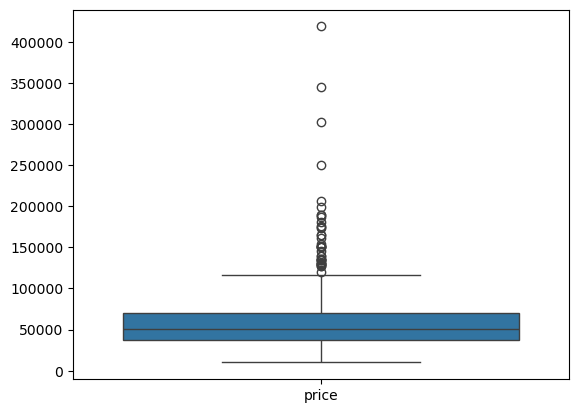

In [53]:
sns.boxplot(df)

In [54]:
from scipy import stats

z_scores = np.abs(stats.zscore(df['price']))

# Define a threshold for Z-score
threshold = 3

# Filter out the outliers (those with Z-score > threshold)
df = df[z_scores <= threshold]


<Axes: >

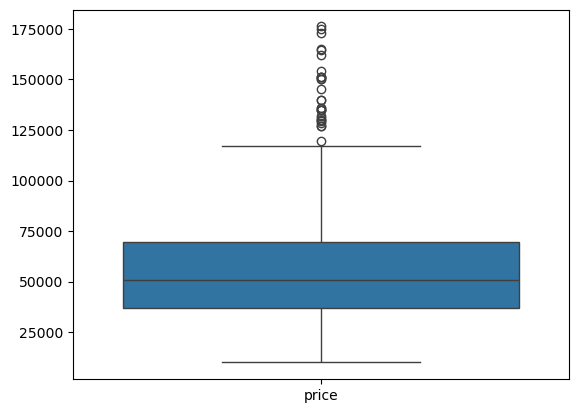

In [55]:
sns.boxplot(df)

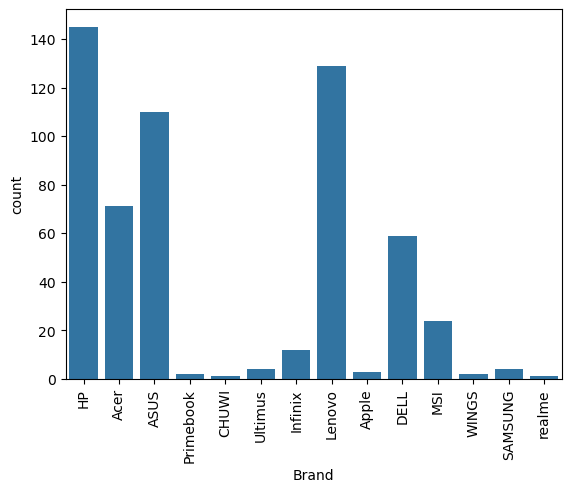

In [56]:
sns.countplot(x = 'Brand' , data = df2)
plt.xticks(rotation=90) 
plt.show()

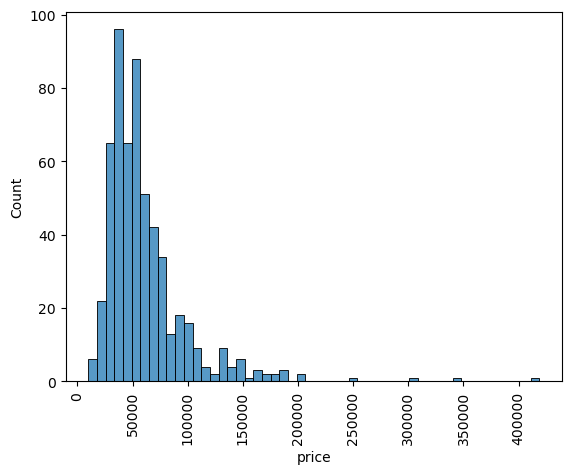

In [57]:
sns.histplot(x = 'price' , data = df2)
plt.xticks(rotation=90) 
plt.show()

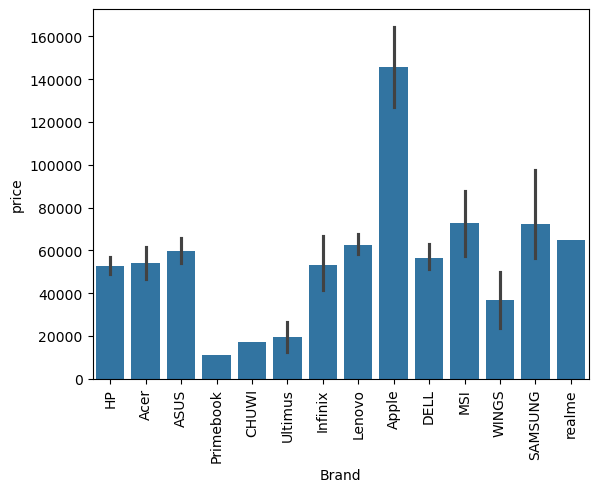

In [58]:
sns.barplot(x = 'Brand' , y = 'price' , data = df)
plt.xticks(rotation=90) 
plt.show()

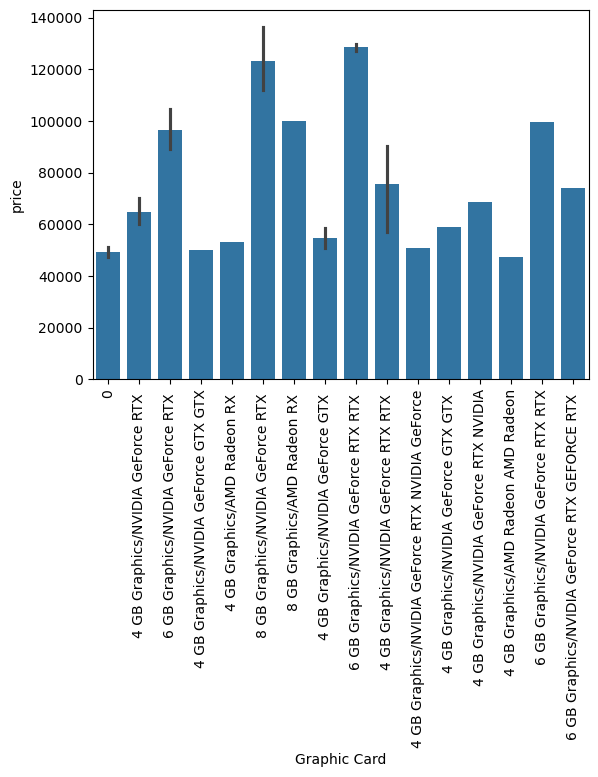

In [59]:
sns.barplot(x = 'Graphic Card' , y = 'price' , data = df)
plt.xticks(rotation=90) 
plt.show()

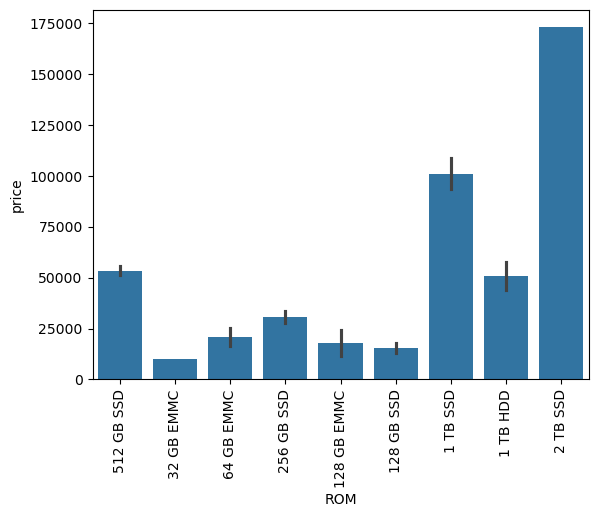

In [60]:
sns.barplot(x = 'ROM' , y = 'price' , data = df)
plt.xticks(rotation=90) 
plt.show()

In [61]:
data = df.Brand.value_counts()

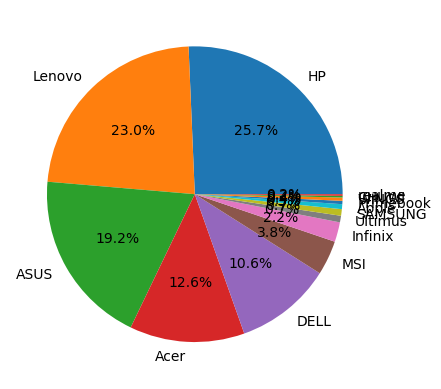

In [62]:
plt.pie(data , labels = data.index , autopct = '%1.1f%%' )
plt.show()

In [63]:
df['Brand'].value_counts()

Brand
HP           143
Lenovo       128
ASUS         107
Acer          70
DELL          59
MSI           21
Infinix       12
Ultimus        4
SAMSUNG        4
Apple          3
Primebook      2
WINGS          2
CHUWI          1
realme         1
Name: count, dtype: int64

In [64]:
df2.to_csv('laptop_project2.csv' , index = False)